# Decision Tree - 1

In [11]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing

import warnings 
warnings.filterwarnings('ignore')

In [12]:
company_data= pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [13]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [14]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [15]:
company_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


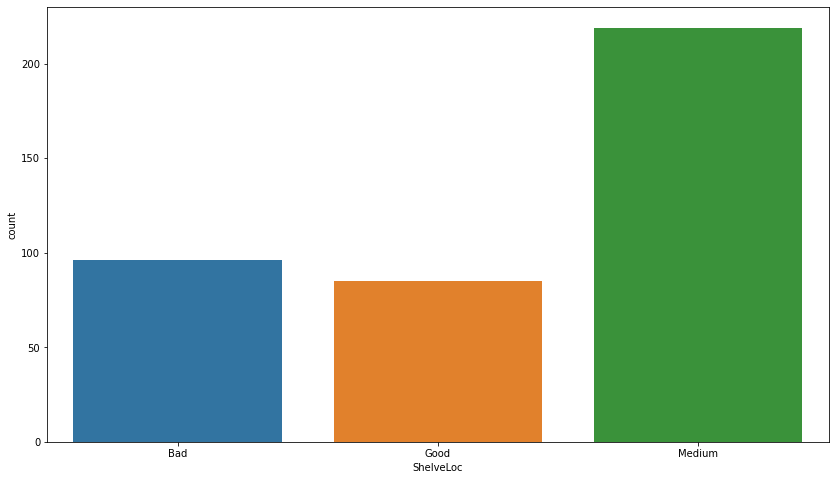

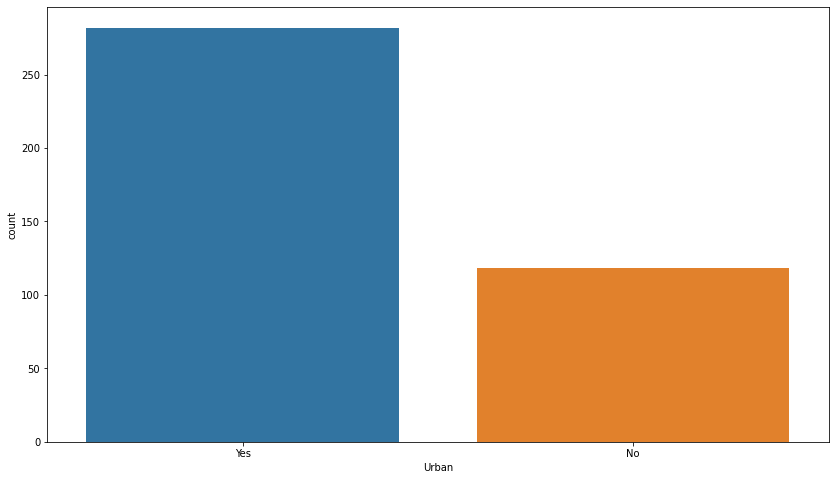

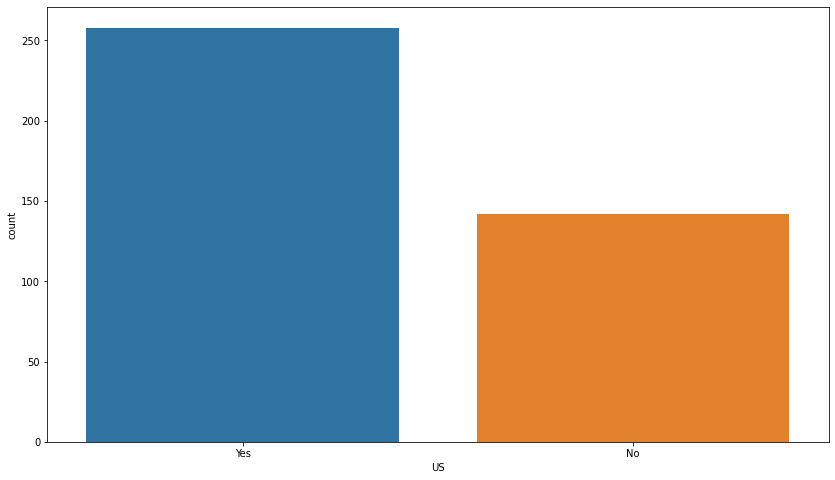

In [16]:
#checking count of categories for categorical columns 
plt.figure(figsize=(14,8))
sns.countplot(company_data['ShelveLoc'])
plt.show()

plt.figure(figsize=(14,8))
sns.countplot(company_data['Urban'])
plt.show()

plt.figure(figsize=(14,8))
sns.countplot(company_data['US'])
plt.show()

In [17]:
# Converting target variable 'Sales' into categoriesLow, medium and high.
company_data['Sales'] = pd.cut(x=company_data['Sales'],bins=[0,6,12,17],labels=['Low','Medium','High'],right = False)
company_data['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

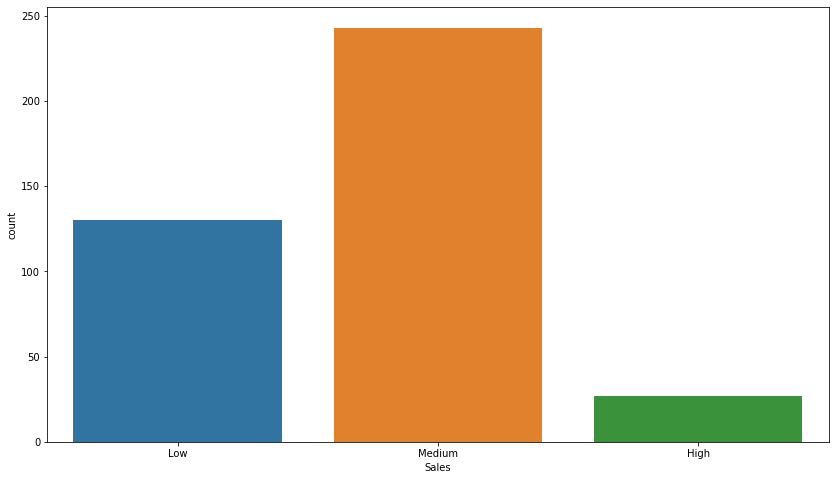

In [18]:
plt.figure(figsize=(14,8))
sns.countplot(company_data['Sales'])
plt.show()

In [19]:
company_data['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [22]:
# Converting other attributes into categories
company_data['CompPrice'] = pd.cut(x=company_data['CompPrice'],bins=[77, 100, 133, 176], labels=['Low','Medium', 'High'], right = False)

company_data['Income'] = pd.cut(x=company_data['Income'],bins=[21, 46, 71, 121], labels=['Low','Medium', 'High'], right = False)

company_data['Advertising'] = pd.cut(x=company_data['Advertising'],bins=[0, 10, 20, 30], labels=['Low','Medium', 'High'], right = False)

company_data['Population'] = pd.cut(x=company_data['Population'],bins=[10, 170, 340, 510], labels=['Low','Medium', 'High'], right = False)

company_data['Price'] = pd.cut(x=company_data['Price'],bins=[24, 80, 136, 192], labels=['Low','Medium', 'High'], right = False)

company_data['Age'] = pd.cut(x=company_data['Age'],bins=[25, 45, 60, 81], labels=['Low','Medium', 'High'], right = False)

company_data['Education'] = pd.cut(x=company_data['Education'],bins=[10, 12.5, 15, 19], labels=['Low','Medium', 'High'], right = False)

In [23]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,High,High,Medium,Medium,Medium,Bad,Low,High,Yes,Yes
1,Medium,Medium,Medium,Medium,Medium,Medium,Good,High,Low,Yes,Yes
2,Medium,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low,Yes,Yes
3,Medium,Medium,High,Low,High,Medium,Medium,Medium,Medium,Yes,Yes
4,Low,High,Medium,Low,High,Medium,Bad,Low,Medium,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,High,High,Medium,Medium,Medium,Good,Low,Medium,Yes,Yes
396,Medium,High,Low,Low,Low,Medium,Medium,Medium,Low,No,Yes
397,Medium,High,Low,Medium,High,High,Medium,Low,High,Yes,Yes
398,Low,Medium,High,Low,Medium,Medium,Bad,Medium,Low,Yes,Yes


In [25]:
#encoding categorical data
label_encoder = preprocessing.LabelEncoder()

company_data['Sales'] = label_encoder.fit_transform(company_data['Sales'])
company_data['CompPrice'] = label_encoder.fit_transform(company_data['CompPrice'])
company_data['Income'] = label_encoder.fit_transform(company_data['Income'])
company_data['Advertising'] = label_encoder.fit_transform(company_data['Advertising'])
company_data['Population'] = label_encoder.fit_transform(company_data['Population'])
company_data['Price'] = label_encoder.fit_transform(company_data['Price'])
company_data['ShelveLoc'] = label_encoder.fit_transform(company_data['ShelveLoc'])
company_data['Age'] = label_encoder.fit_transform(company_data['Age'])
company_data['Education'] = label_encoder.fit_transform(company_data['Education'])
company_data['Urban'] = label_encoder.fit_transform(company_data['Urban'])
company_data['US'] = label_encoder.fit_transform(company_data['US'])

company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,2,1,0,1,1,1
2,2,2,1,2,2,2,2,2,1,1,1
3,2,2,0,1,0,2,2,2,2,1,1
4,1,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,2,2,2,1,1,2,1,1
396,2,0,1,1,1,2,2,2,1,0,1
397,2,0,1,2,0,0,2,1,0,1,1
398,1,2,0,1,2,2,0,2,1,1,1


In [31]:
company_data_corr = company_data.corr()
company_data_corr

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.072262,-0.011800,0.084403,0.059900,0.118394,0.167722,0.032237,-0.015480,0.015228,0.014175
CompPrice,0.072262,1.000000,-0.067776,0.023890,-0.099953,0.283602,-0.032907,-0.020228,0.061327,-0.080875,-0.022295
Income,-0.011800,-0.067776,1.000000,0.022482,0.077719,-0.031260,0.035383,0.096848,-0.023920,-0.037049,-0.037854
Advertising,0.084403,0.023890,0.022482,1.000000,0.042640,0.066699,0.050442,-0.025986,-0.027225,-0.045881,0.425591
Population,0.059900,-0.099953,0.077719,0.042640,1.000000,-0.001096,0.008897,-0.023286,0.004790,0.076840,0.001007
Price,0.118394,0.283602,-0.031260,0.066699,-0.001096,1.000000,-0.002225,0.038107,0.040300,0.004418,0.039251
ShelveLoc,0.167722,-0.032907,0.035383,0.050442,0.008897,-0.002225,1.000000,0.016673,-0.022060,-0.063978,-0.039760
Age,0.032237,-0.020228,0.096848,-0.025986,-0.023286,0.038107,0.016673,1.000000,0.018913,-0.052661,0.063224
Education,-0.015480,0.061327,-0.023920,-0.027225,0.004790,0.040300,-0.022060,0.018913,1.000000,-0.001823,0.030013
Urban,0.015228,-0.080875,-0.037049,-0.045881,0.076840,0.004418,-0.063978,-0.052661,-0.001823,1.000000,0.047085


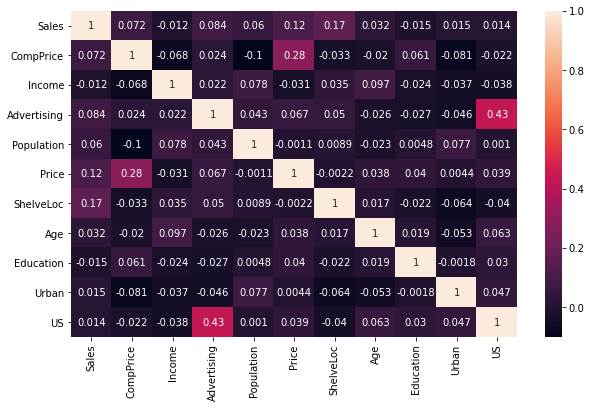

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(data=company_data_corr,annot=True)
plt.show()


In [33]:
#Dividing data into indepenent variables and dependent variable
x = company_data.iloc[:,1:]
y = company_data['Sales']

In [34]:
x 

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,0,2,2,2,0,1,0,1,1
1,2,2,2,2,2,1,0,1,1,1
2,2,1,2,2,2,2,2,1,1,1
3,2,0,1,0,2,2,2,2,1,1
4,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...
395,0,0,2,2,2,1,1,2,1,1
396,0,1,1,1,2,2,2,1,0,1
397,0,1,2,0,0,2,1,0,1,1
398,2,0,1,2,2,0,2,1,1,1


In [35]:
y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int64

In [36]:
#Spliting data into testing and traing  dataset
x_train,x_test,y_train,y_test = train_test_split(x, y ,test_size=0.33,random_state = 40)

In [37]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
290,2,0,2,0,2,2,1,1,0,1
336,0,1,1,1,0,0,1,0,1,0
212,0,2,2,0,2,2,2,1,1,1
296,2,1,2,1,2,1,0,0,1,1
10,2,0,1,1,2,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
306,2,1,1,1,2,2,2,1,1,1
165,0,2,1,1,0,0,1,0,1,1
7,0,0,2,0,2,1,0,1,1,1
219,2,0,2,0,2,1,2,0,1,1


In [38]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
132,2,0,1,2,0,1,0,1,1,1
390,2,0,1,1,2,2,0,1,1,1
310,0,2,0,0,0,2,2,1,1,1
3,2,0,1,0,2,2,2,2,1,1
248,2,2,1,1,2,2,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
215,2,0,2,2,0,0,0,1,1,1
314,0,1,2,2,2,1,0,2,1,1
259,2,1,2,0,2,0,0,1,0,1
49,0,0,1,1,0,1,1,0,1,0


In [39]:
y_train

290    2
336    1
212    0
296    2
10     2
      ..
306    1
165    1
7      2
219    2
326    1
Name: Sales, Length: 268, dtype: int64

In [40]:
y_test

132    2
390    1
310    2
3      2
248    1
      ..
215    1
314    2
259    1
49     2
227    2
Name: Sales, Length: 132, dtype: int64

#  Building decision tree classifier using Entropy criteria

In [41]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

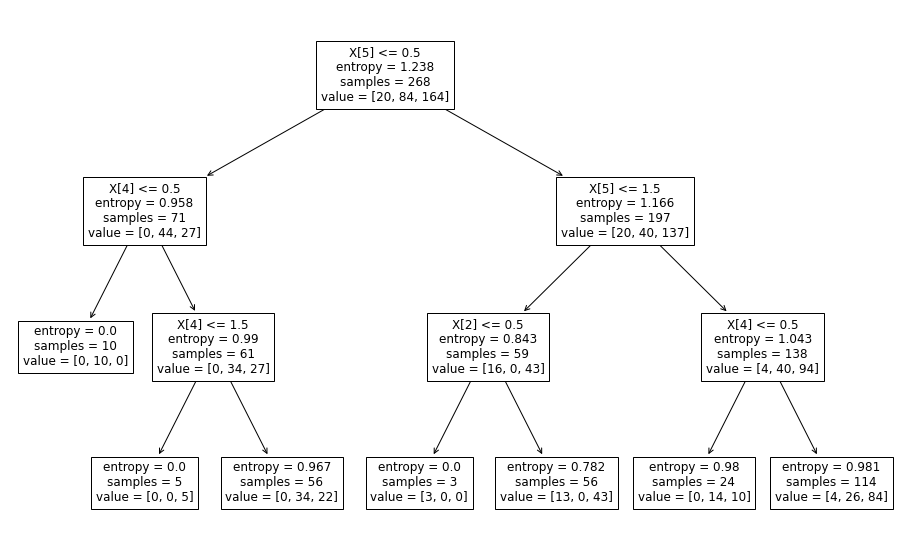

In [42]:
#Plot the decision tree
plt.figure(figsize=(16,10))
tree.plot_tree(model);

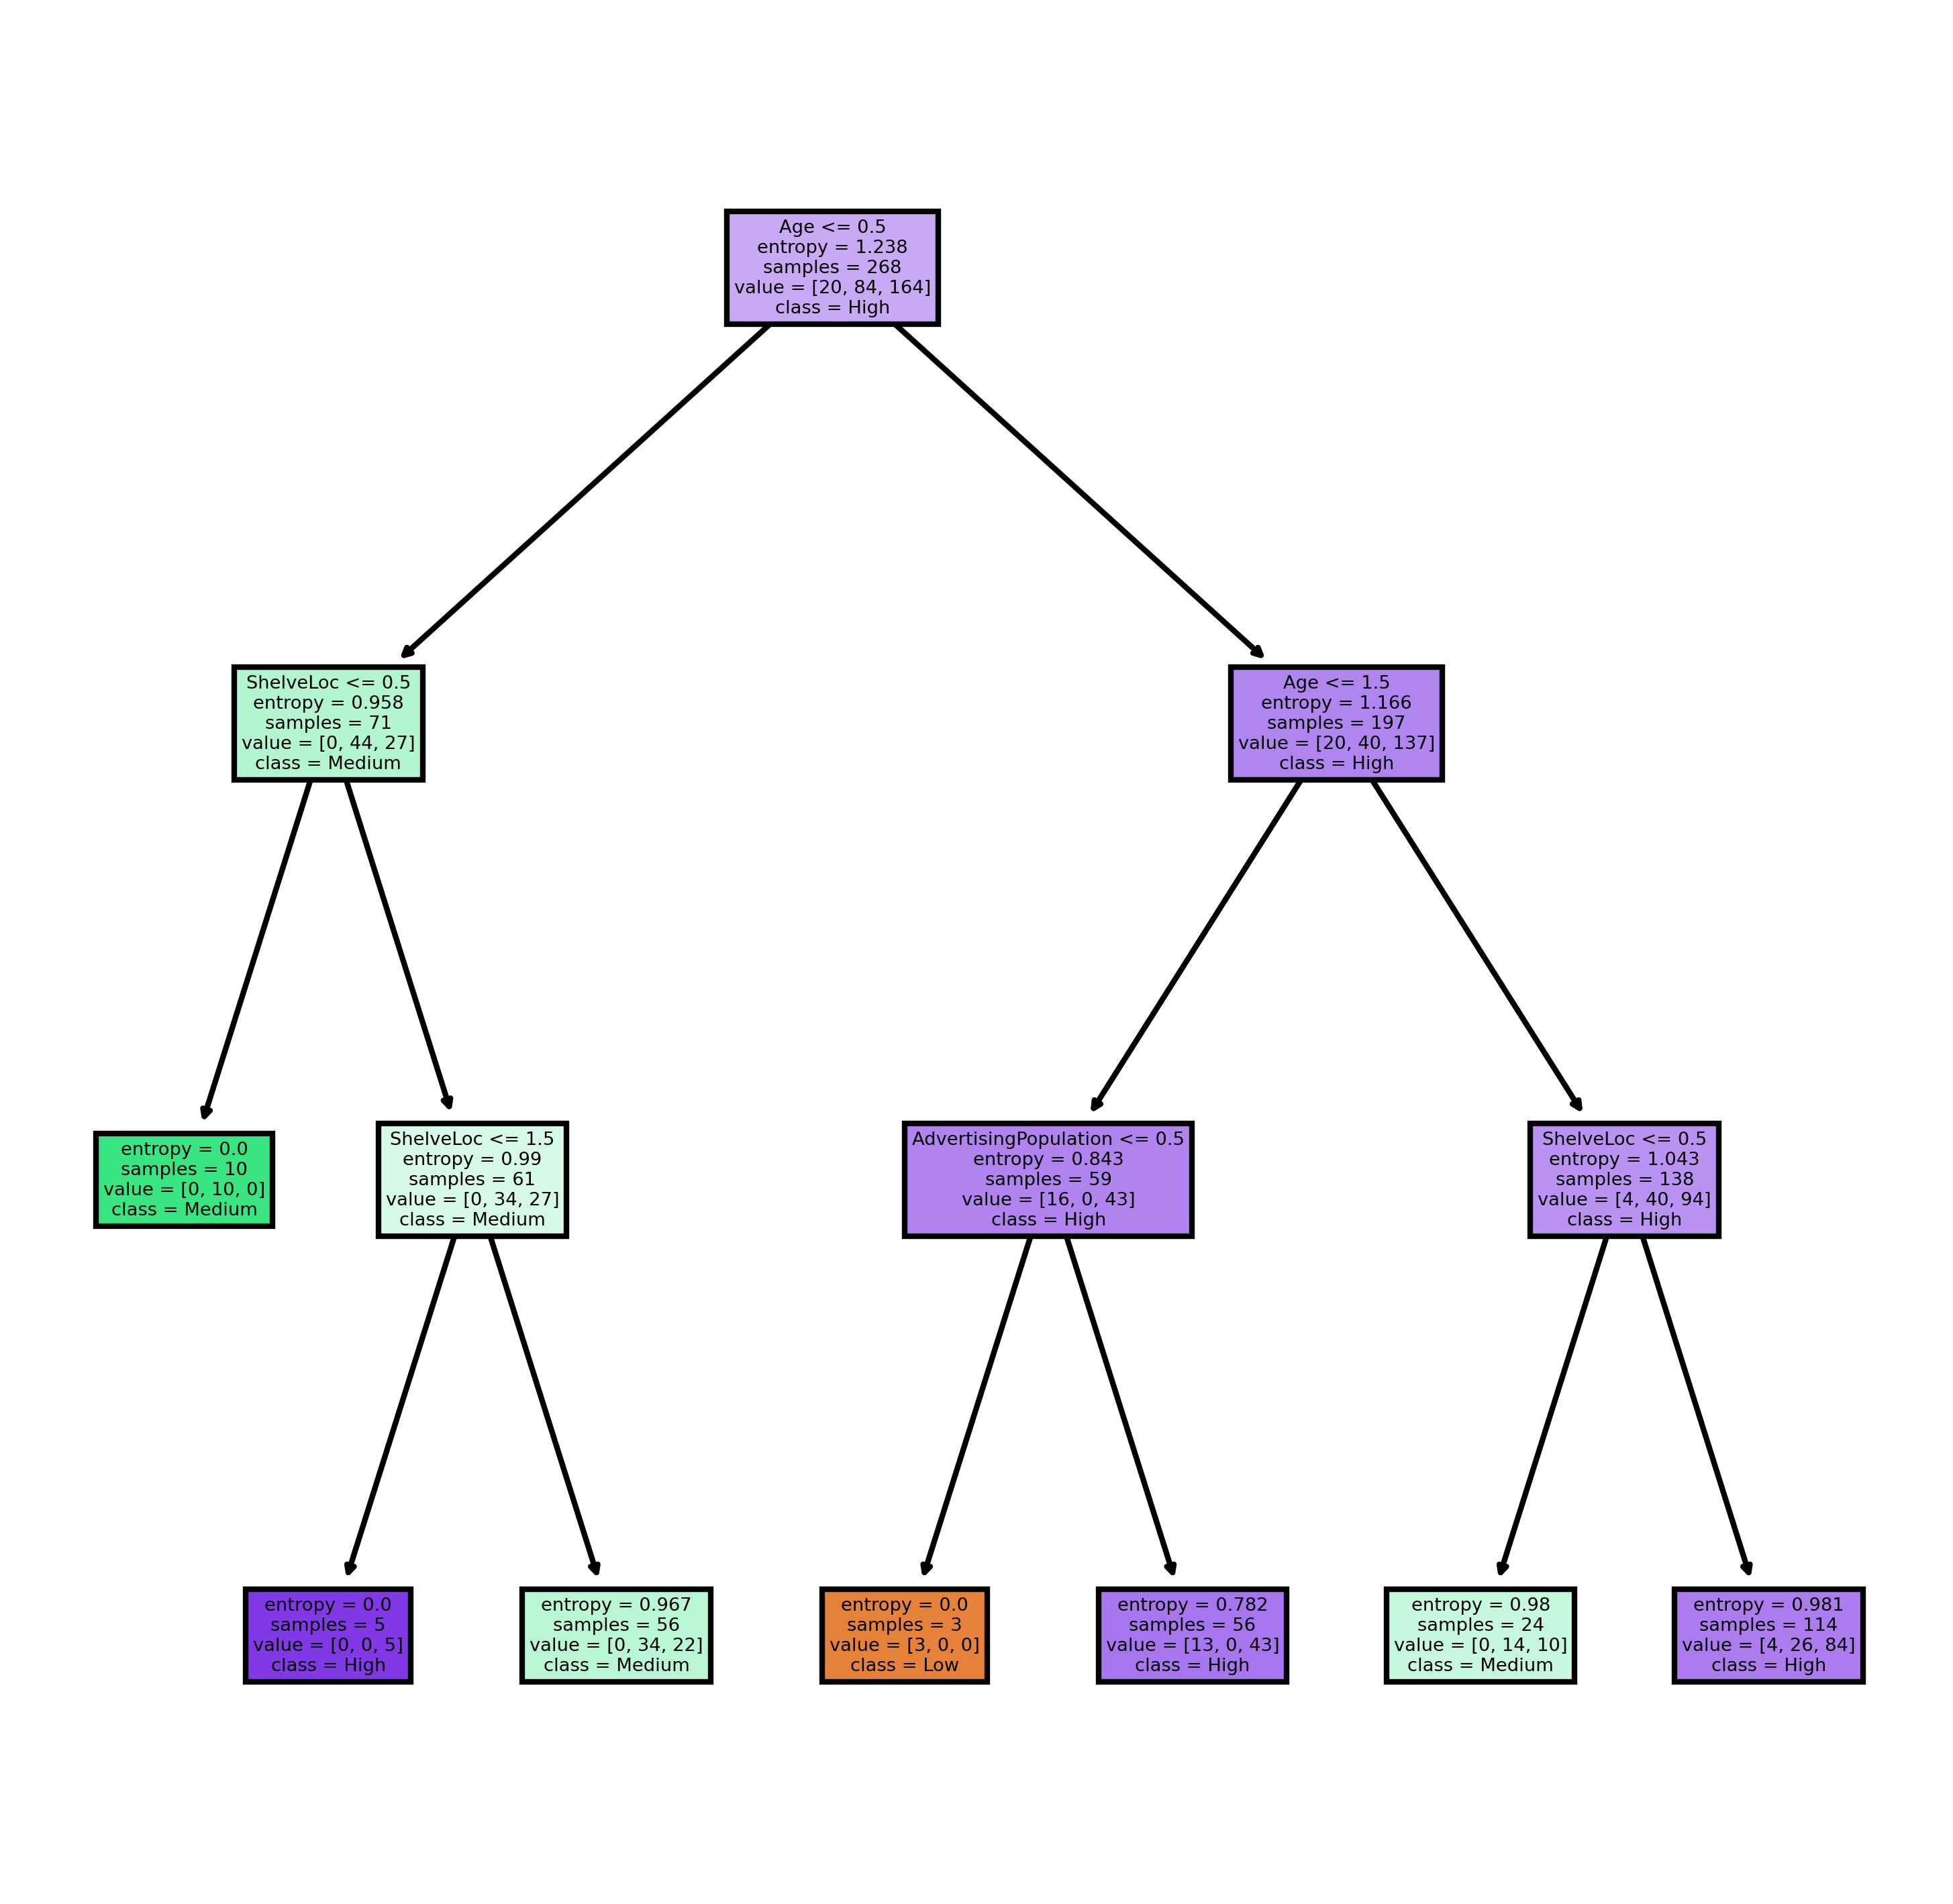

In [43]:
fn = ['Comprice', 'Income','Advertising' 'Population',
      'Price','ShelveLoc','Age', 'Education', 'Urban', 'US']
cn = ['Low','Medium', 'High']
fig, axes = plt.subplots(nrows=1,ncols=1,figsize = (6,6),dpi=600)
tree.plot_tree(model,
              feature_names= fn,
              class_names= cn,
              filled=True);

In [44]:
#predicting on test data
pred = model.predict(x_test) #predicting on  test dataset
pd.Series(pred).value_counts()#getting the count of each category

2    93
1    38
0     1
dtype: int64

In [45]:
pred

array([2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2],
      dtype=int64)

In [46]:
# getting the 2 way table to understand  the correct and wrong prediction
pd.crosstab(y_test,pred)

col_0,0,1,2
Sales,,,
0,0,0,7
1,0,27,19
2,1,11,67


In [47]:
#Accuracy
np.mean(pred==y_test)

0.7121212121212122

# Building decision tree classifier(CART) using Gini Criteria

In [48]:
model_gini= DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini

DecisionTreeClassifier(max_depth=3)

In [49]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

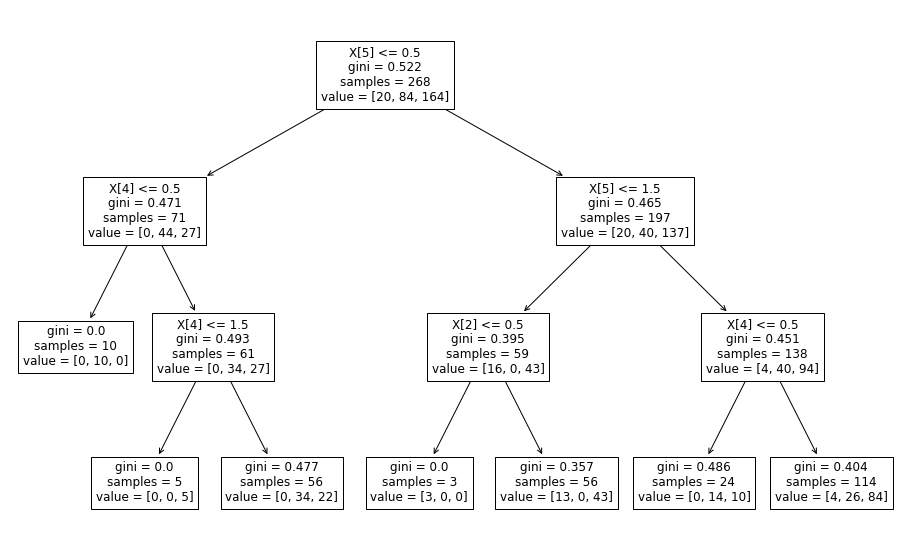

In [50]:
#ploting decision tree 
plt.figure(figsize=(16,10))
tree.plot_tree(model_gini);

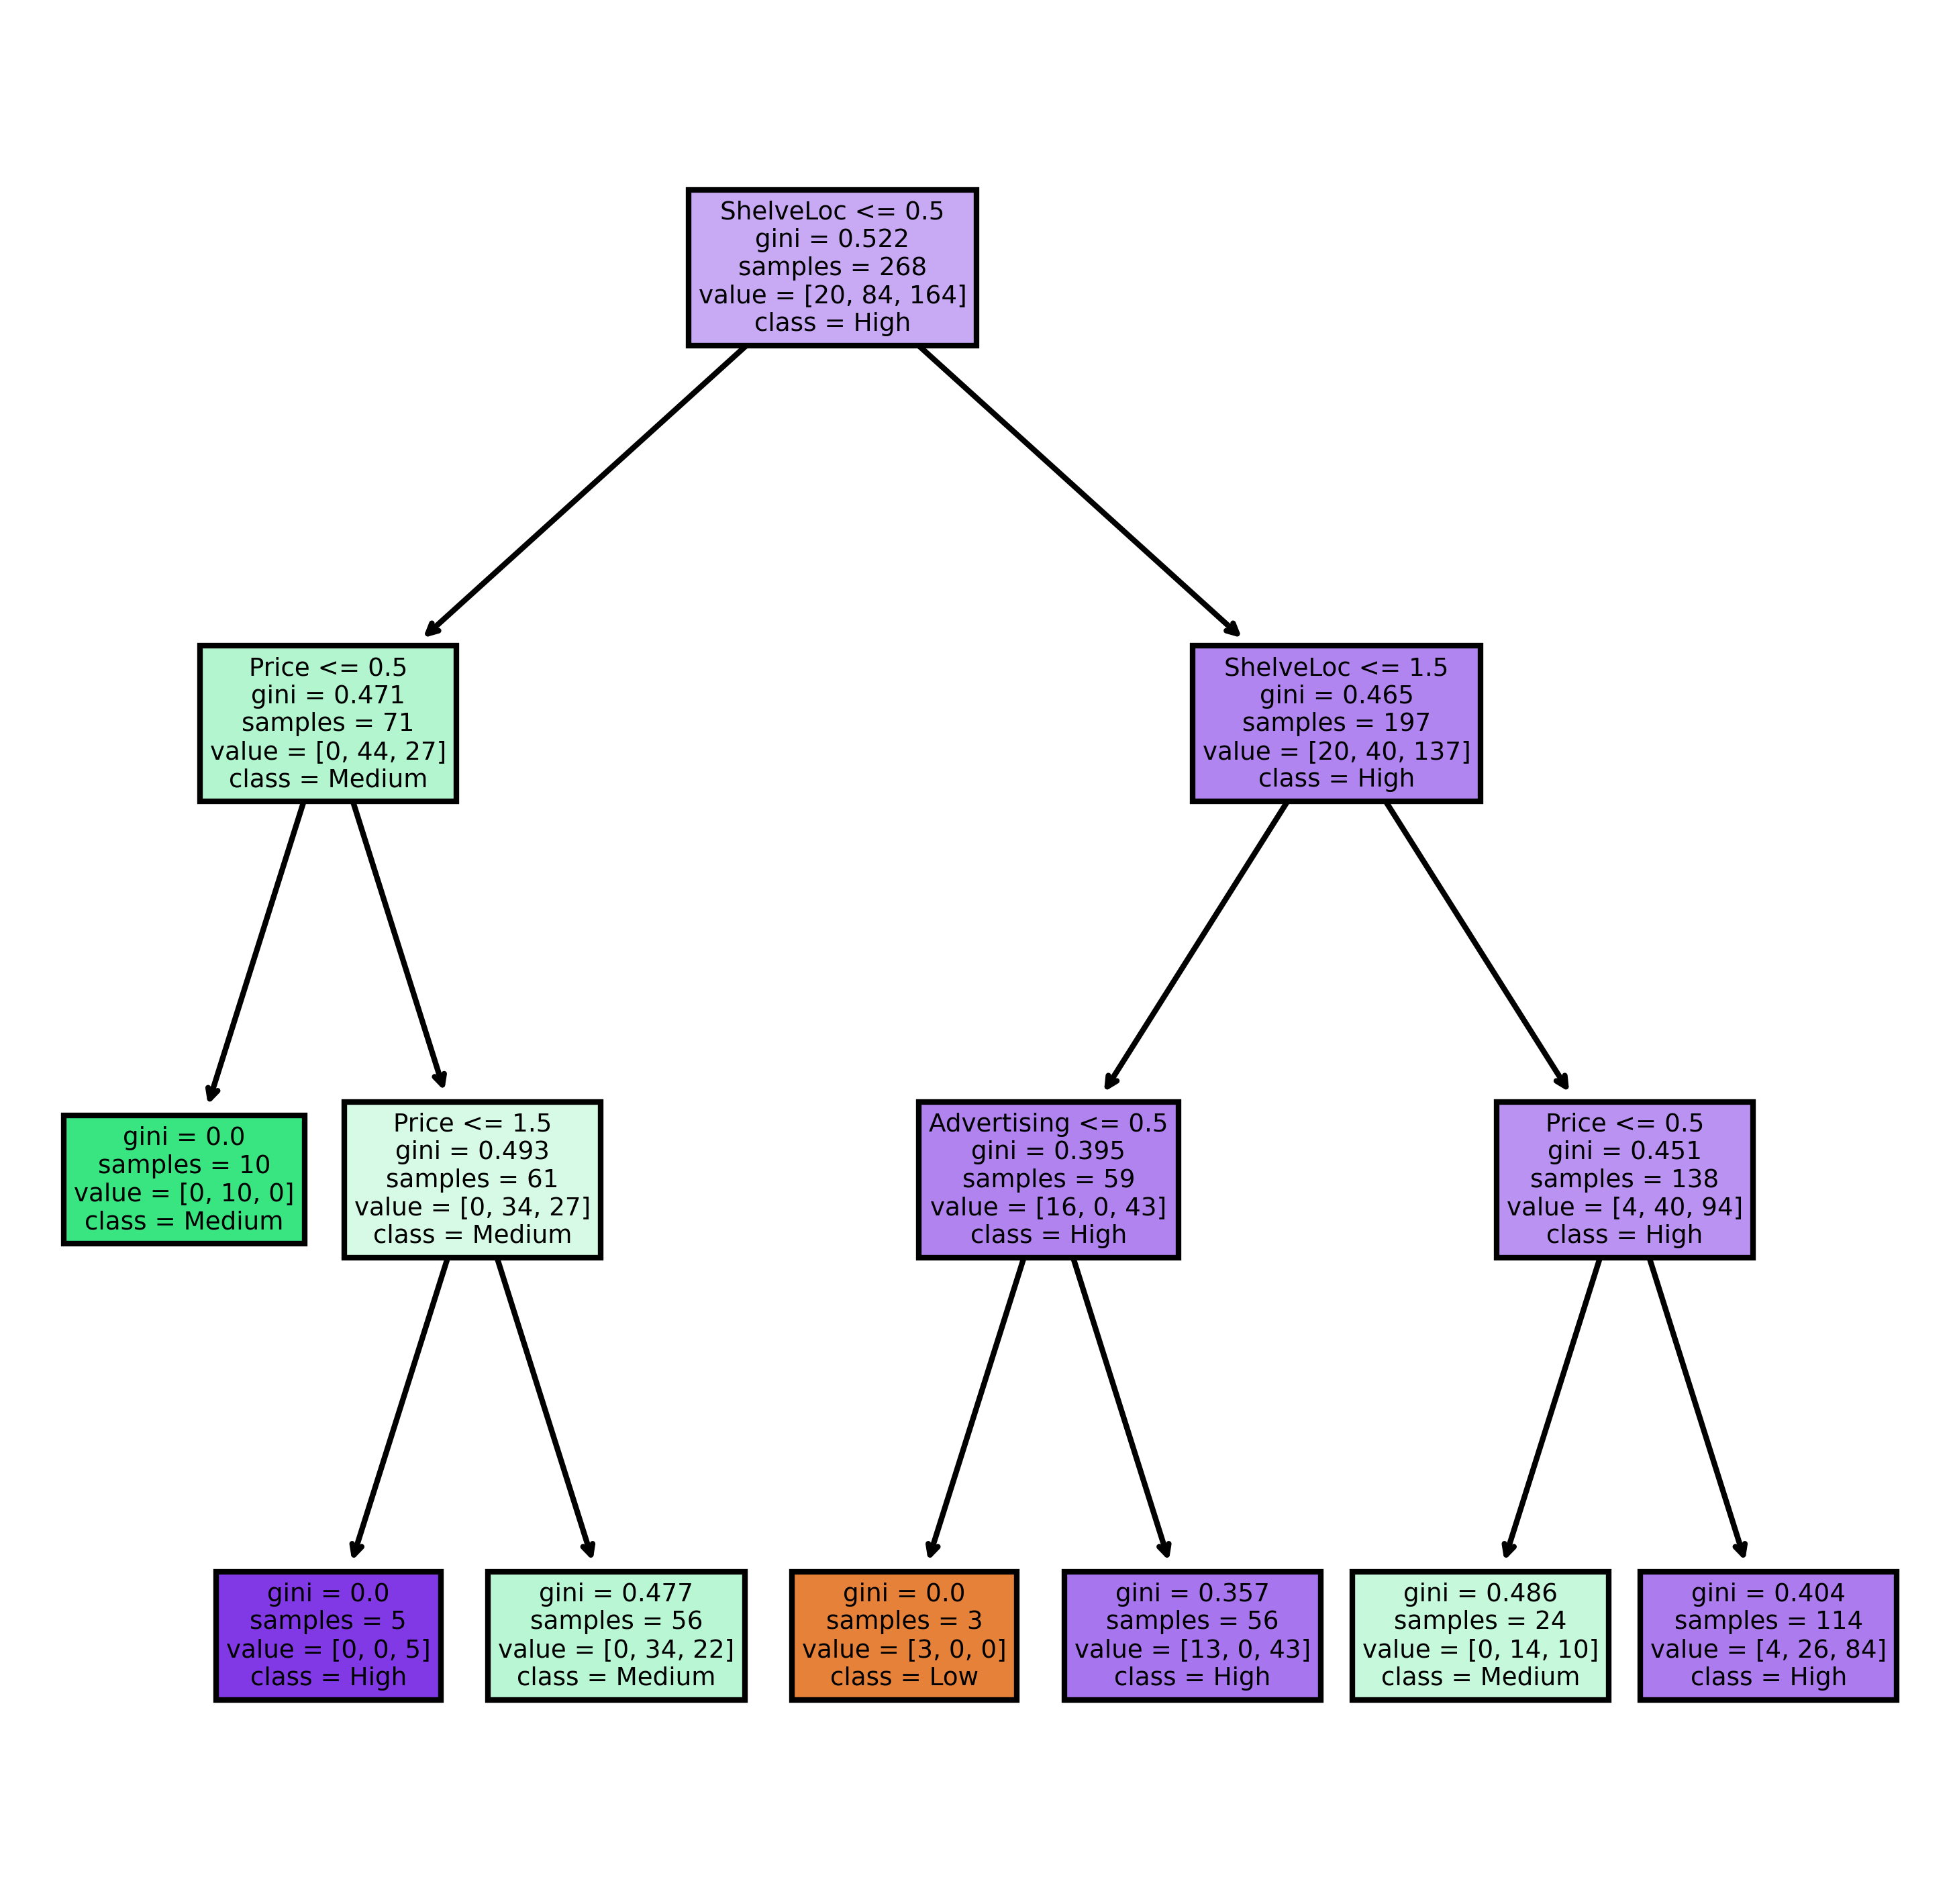

In [51]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [52]:
preds = model_gini.predict(x_test)
pd.Series(preds).value_counts()

2    93
1    38
0     1
dtype: int64

In [53]:
preds

array([2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2],
      dtype=int64)

In [54]:
#creating cross model for checking model
pd.crosstab(y_test,preds)

col_0,0,1,2
Sales,,,
0,0,0,7
1,0,27,19
2,1,11,67


In [55]:
# Checking accuracy of model
model_gini.score(x_test, y_test)

0.7121212121212122